Here we run a separation test.

In [1]:
import sys
sys.path.insert(0,"../")
import mview

In this test, the data is divided in two clusters in each of two perspective. The labels are then different for each perspective.

  mview.MPSE():
    data details:
      number of perspectives : 2
      number of samples : 500
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 500
        embedding details:
          embedding dimension : 2
          perplexity : 200.00
        TSNE.initialize():
          method : random
          initial cost : 1.97e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 500
        embedding details:
          embedding dimension : 2
          perplexity : 200.00
        TSNE.initialize():
          method : random
          initial cost : 1.97e+00
    initialize:
      fixed embedding : False
      initial embedding : random
      fixed projections : False
      initial projections : random
    MPSE.gd():
        initial s

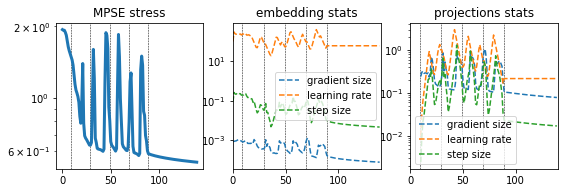

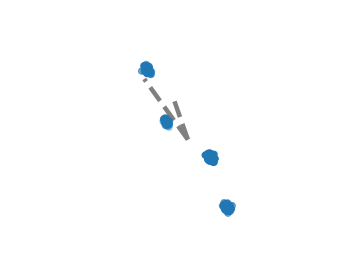

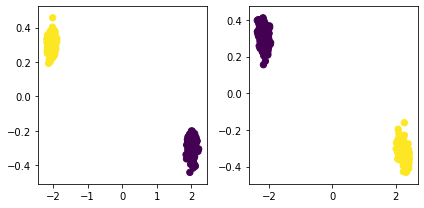

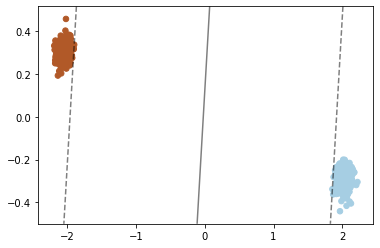

error in 0 -th view: 0.0


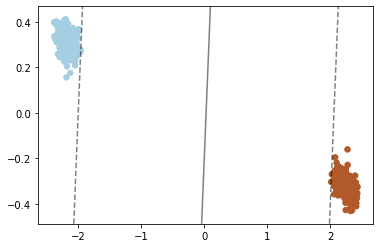

error in 1 -th view: 0.0


In [2]:
results = mview.mpse_tsne('clusters', n_samples=500, n_clusters=2, n_perspectives=2, perplexity=200,
                            show_plots=True, verbose=2)
for i in range(results.n_perspectives):
    image = results.images[i]
    labels = results.image_classes[i]
    error = mview.evaluate.separation_error(image,labels,show_plot=True)
    print('error in',i,'-th perspective:',error)

The same experiment, but with 4 perspectives, looks as follows:

  mview.MPSE():
    data details:
      number of perspectives : 4
      number of samples : 500
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 500
        embedding details:
          embedding dimension : 2
          perplexity : 200.00
        TSNE.initialize():
          method : random
          initial cost : 1.96e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 500
        embedding details:
          embedding dimension : 2
          perplexity : 200.00
        TSNE.initialize():
          method : random
          initial cost : 1.96e+00
  setup visualization instance for perspective 3 :
      mview.TSNE():
        data details:
          number of samples : 500
        embedding details:
          embedding dime

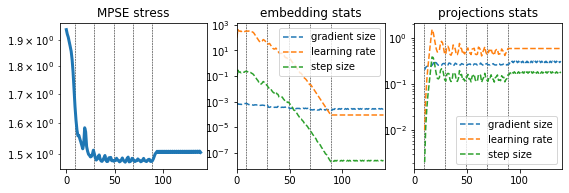

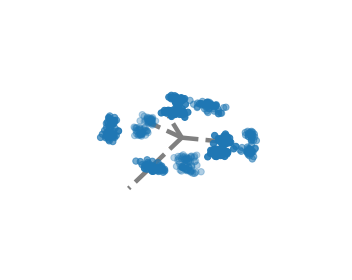

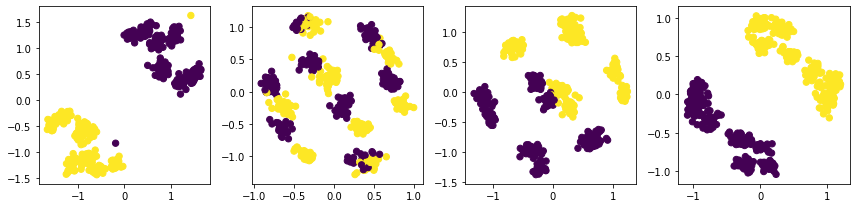

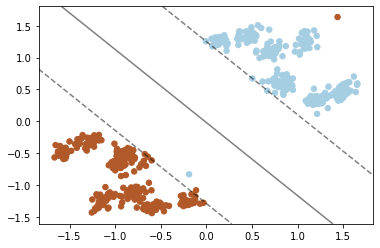

error in 0 -th view: 0.004000000000000001


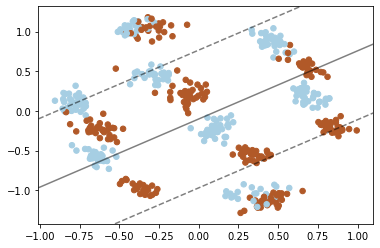

error in 1 -th view: 0.432


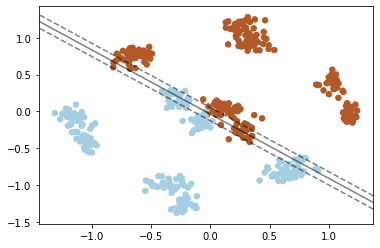

error in 2 -th view: 0.07399999999999998


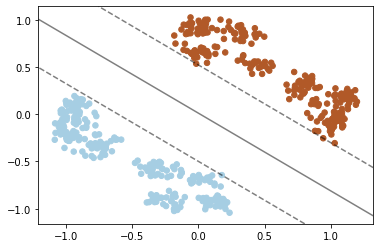

error in 3 -th view: 0.0


In [3]:
results = mview.mpse_tsne('clusters', n_samples=500, n_clusters=2, n_perspectives=4, perplexity=200,
                            show_plots=True, verbose=2)
for i in range(results.n_perspectives):
    Y = results.images[i]
    labels = results.image_classes[i]
    error = mview.evaluate.separation_error(Y,labels,show_plot=True)
    print('error in',i,'-th perspective:',error)

More generally, for more than two clusters, the function evaluate.separation_error will find the best dividing plane for each pair of classes and average the result.

Here, we run the result for 2 and 3 clusters (in two perspectives). The output is still the same (a single number measuring the average error for the image), but note that we now have more plots for the 2nd perspective.

  mview.MPSE():
    data details:
      number of perspectives : 2
      number of samples : 500
    visualization details:
      embedding dimension : 3
      image dimension : 2
      visualization type : tsne
  setup visualization instance for perspective 1 :
      mview.TSNE():
        data details:
          number of samples : 500
        embedding details:
          embedding dimension : 2
          perplexity : 200.00
        TSNE.initialize():
          method : random
          initial cost : 1.97e+00
  setup visualization instance for perspective 2 :
      mview.TSNE():
        data details:
          number of samples : 500
        embedding details:
          embedding dimension : 2
          perplexity : 200.00
        TSNE.initialize():
          method : random
          initial cost : 1.97e+00
    initialize:
      fixed embedding : False
      initial embedding : random
      fixed projections : False
      initial projections : random
    MPSE.gd():
        initial s

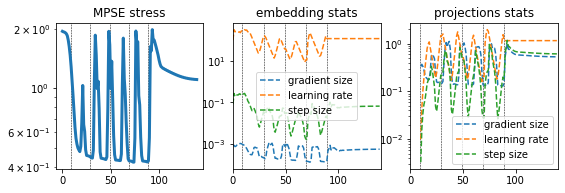

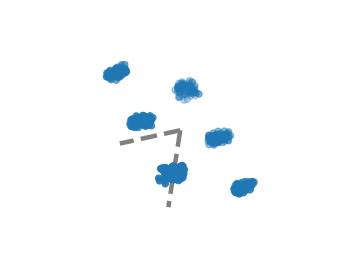

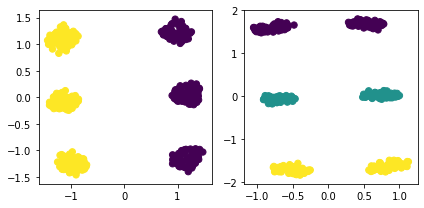

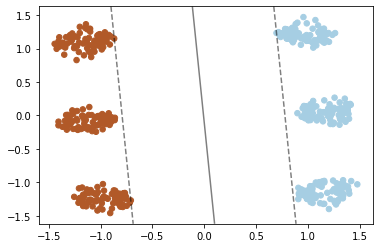

error in 0 -th view: 0.0


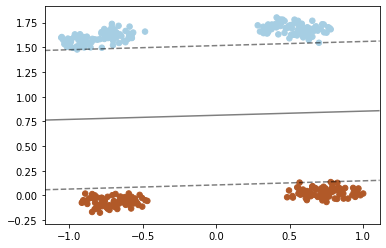

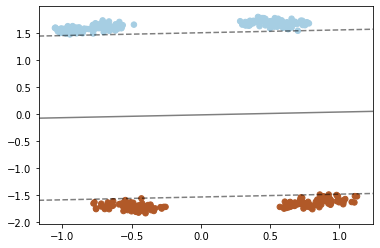

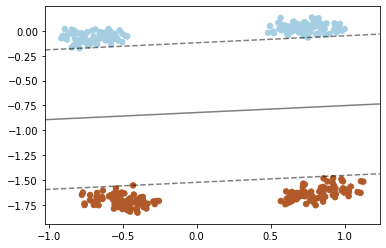

error in 1 -th view: 0.0


In [4]:
results = mview.mpse_tsne('clusters', n_samples=500, n_clusters=[2,3], perplexity=200,
                            show_plots=True, verbose=2)
for i in range(results.n_perspectives):
    Y = results.images[i]
    labels = results.image_classes[i]
    error = mview.evaluate.separation_error(Y,labels,show_plot=True)
    print('error in',i,'-th view:',error)

If you would like to have the individual error for each pair of clusters in the image, set the keyword argument return_individual_errors to True. The individual errors are organized in the usual order, i.e. (0,1),(0,2),(1,2) for 3 classes. Make sure the labels are numbers 0 to n_classes-1 and that each class has at least a few members.

In [6]:
for i in range(results.n_perspectives):
    Y = results.images[i]
    labels = results.image_classes[i]
    error = mview.evaluate.separation_error(Y,labels,return_individual_errors=True)
    print('the errors in the',i,'-th view are:',error)

the errors in the 0 -th view are: [0.0]
the errors in the 1 -th view are: [0.0, 0.0, 0.0]
